# Introduction to Machine Learning
## Programming Assignment 1

In [1]:
# loading libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# [Index](#Index)
### [Breast Cancer](#Breast-Cancer)
### [glass](#glass)
### [iris](#iris)
### [vote](#vote)
### [soybean](#soybean)
### [Winnow2](#Winnow2)
### [cross_validation](#Cross-Validation)
### [Parameter-Tuning](#Parameter-Tuning)

## [Breast-Cancer](#Index)

### EDA

In [2]:
file_loc = './Data_Set/breast-cancer-wisconsin.data'
bc = pd.read_csv(file_loc, header = None)

      Attribute Names               Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                      1 - 10
   11. Class:                       (2 for benign, 4 for malignant)

In [3]:
# saving attribute names for future use
names = ['Clump Thickness',
'Uniformity of Cell Size',
'Uniformity of Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Bland Chromatin',
'Normal Nucleoli',
'Mitoses']

In [4]:
bc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#checking basic stat
bc.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# there are 16 missing values
np.sum(bc.eq('?').any(1))

C:\Users\ituki\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


16

In [7]:
#target value. Will convert this to binary, i.e. if y == 2 => 0, otherwise 1 (y ==4)
bc_y = [0 if x == 2 else 1 for x in bc[10] ]

As shown, some variables are normally distributed while others are not. 

## Missing Values *
We must deal with missing values in this dataset. From the documentation, it was noted that col 6 contains missing values or NAs. 

In [8]:
NAs = []
for i in range(10):
    for j in range(698):
        if bc[i][j]== '?':
            NAs.append([i,j])

Confirming all of the missing values are in col 6. Let's see the distribution of col 6.

In [9]:
NAs # all the '?' are in col 6 'Bare Nuclei'

[[6, 23],
 [6, 40],
 [6, 139],
 [6, 145],
 [6, 158],
 [6, 164],
 [6, 235],
 [6, 249],
 [6, 275],
 [6, 292],
 [6, 294],
 [6, 297],
 [6, 315],
 [6, 321],
 [6, 411],
 [6, 617]]

(array([402.,  30.,  28.,  19.,  30.,   4.,   8.,  21.,   9., 132.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

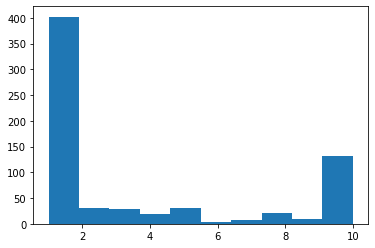

In [10]:
bc_vals = bc[6][bc[6]!='?'].astype('int') # extracting non-NA values
plt.hist(bc_vals)

Imputing missing value by drawing random sample of the valid entries which are distributed as shown above. 

In [11]:
# replacing NAs with samples
samples = np.random.choice(bc_vals, 16).copy()
for k, i in enumerate(NAs):
    bc.iloc[i[1],i[0]] = samples[k]

In [12]:
# checking no more missing value
sum(bc.iloc[:][6] == '?')

0

In [13]:
# converting to numeric
bc[6] = bc[6].astype('int64')

## Distribution of each parameters

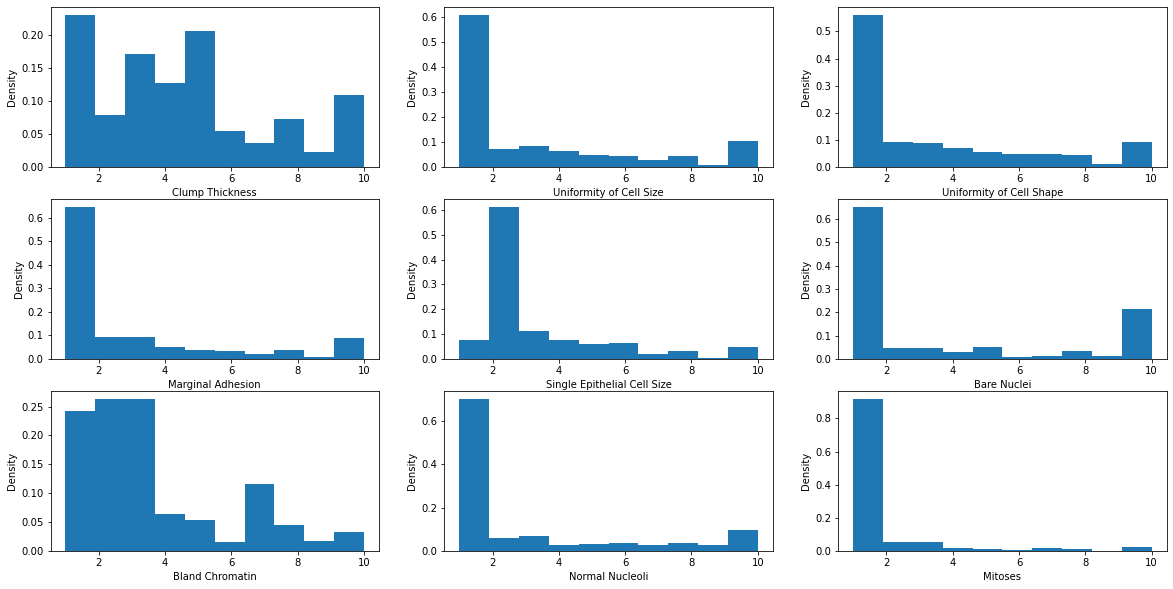

In [14]:
figure = plt.figure(figsize=(20, 10))
for i in range(1,10):
    axes = figure.add_subplot(3, 3, i)
    axes.hist( bc[i], density=True)
    axes.set_ylabel( "Density")
    axes.set_xlabel( names[i-1])
plt.show()

Checking the target value. The target values is not evenly distributed.

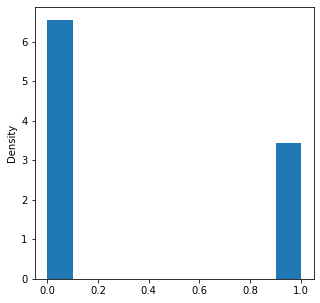

In [15]:
figure = plt.figure(figsize=(5, 5))
axes = figure.add_subplot(1,1,1)
axes.hist( bc_y, density=True)
axes.set_ylabel( "Density")
plt.show()

## Categorical to binary *
The algorithm requires all the input values to be binary. We use One-Hot rencoding to convert categorical values to binary.

In [16]:
def one_hot(col, val_range):
    res = []
    for i in col:
        arr = [0]*val_range
        arr[i-1]=1
        res.append(arr) 
    return pd.DataFrame(res)

The transformation will result in below format

In [17]:
pd.DataFrame(bc[1])

,1
0,5
1,5
2,3
3,6
4,4
...,...
694,3
695,2
696,5
697,4


In [18]:
one_hot(bc[1],10)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
694,0,0,1,0,0,0,0,0,0,0
695,0,1,0,0,0,0,0,0,0,0
696,0,0,0,0,1,0,0,0,0,0
697,0,0,0,1,0,0,0,0,0,0


We will now tranform all entire data into one-hot.

In [19]:
def To_One_Hot(df, col_range= range(1,10), categories= [10]*10):
    res = pd.DataFrame()
    colnames = []
    for i in col_range:
        n_category = categories[i]
        col = df[i]
        colnames += [str(i)+str(x).zfill(2) for x in range(n_category)]
        C = one_hot(col, n_category)
        res = pd.concat([res, C], 1)
    res.columns = colnames
    return res

In [20]:
bc # the original non-binary

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [21]:
# after one-hot
bc_OH = To_One_Hot(bc)
bc_OH 

,100,101,102,103,104,105,106,107,108,109,...,900,901,902,903,904,905,906,907,908,909
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
695,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
696,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
697,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## [glass](#Index)
The follwoing is the attribute Information from the original data:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    1. building_windows_float_processed
    2. building_windows_non_float_processed
    3. vehicle_windows_float_processed
    4. vehicle_windows_non_float_processed (none in this database)
    5. containers
    6. tableware
    7. headlamps

In [22]:
glass_names = ['RI: refractive index',
'Na: Sodium',
'Mg: Magnesium',
'Al: Aluminum',
'Si: Silicon',
'K: Potassium',
'Ca: Calcium',
'Ba: Barium',
'Fe: Iron']

In [23]:
file_loc = './Data_Set/glass.data'
glass = pd.read_csv(file_loc, header = None)

In [24]:
# confirming no NAs
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [25]:
glass.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


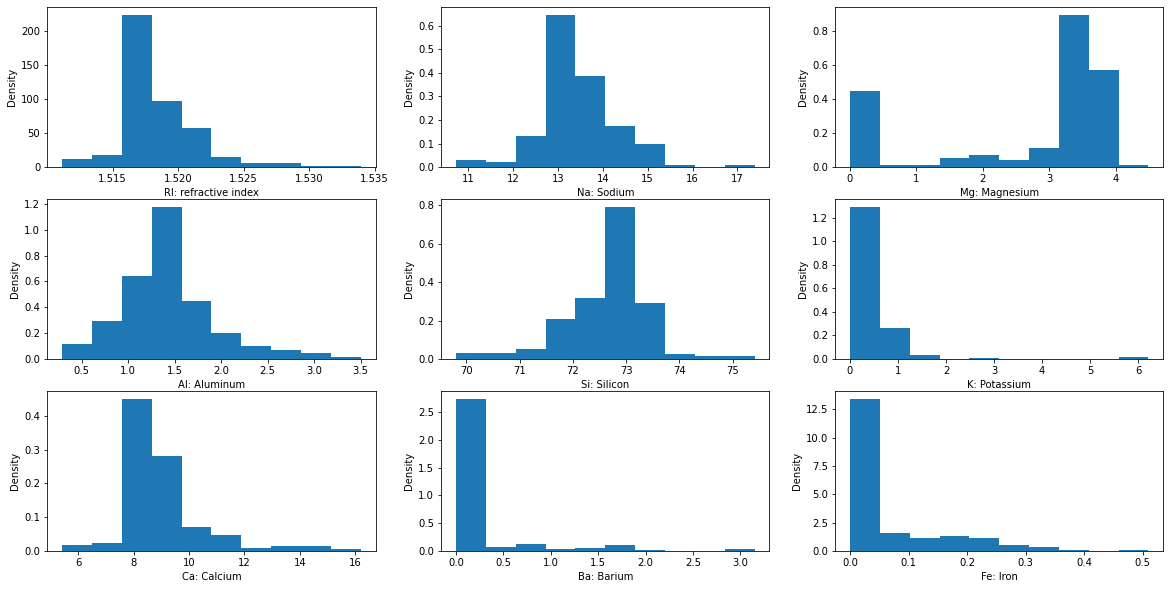

In [26]:
figure = plt.figure(figsize=(20, 10))
for i in range(1,10):
    axes = figure.add_subplot(3, 3, i)
    axes.hist( glass[i], density=True)
    axes.set_ylabel( "Density")
    axes.set_xlabel( glass_names[i-1])
plt.show()

## glass target value
The target value in this data is categorical. FOr our purpose, we also need to convert the target value to binary

(array([70., 76.,  0., 17.,  0.,  0., 13.,  0.,  9., 29.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

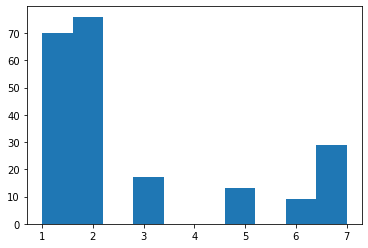

In [27]:
glass_y = glass[10]
plt.hist(glass_y)

Since it is a discrete value, we need to convert it to binary

In [28]:
glass_y_OH = one_hot(glass_y,7)
glass_y_OH

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
209,0,0,0,0,0,0,1
210,0,0,0,0,0,0,1
211,0,0,0,0,0,0,1
212,0,0,0,0,0,0,1


## Continuous to descrete value*
For our purpose, we must convert the continuous value to descrete categorical values. We will use equal binning method.

In [29]:
# function to descretize value using equal-width binning 
def bins(col, n_bins = 10):
    '''
    Input:
    col: column vector to be converted to binary
    n_bins: number of bins
    Outout:one-hot encoded matrix in dataframe
    '''
    n = len(col)
    res = [0]*n
    M, m = max(col), min(col)
    seg = (M-m)/n_bins
    B=[0]+[m+seg*j for j in range(n_bins)]+[M]
    for i in range(n):
        for j in range(len(B)-1):
            if (col[i]>=B[j]) and (col[i]< B[j+1]):
                res[i]=j
            if (col[i]>M-seg) and col[i]<=M :
                res[i]=n_bins    
    return pd.DataFrame(res)

In [30]:
# wrapper function to convert a dataframe to one-hot
def To_Category(df,col_range, n_category):
    df_descrete= pd.DataFrame()
    for i in col_range:
        c = bins(df[i], n_category)
        df_descrete = pd.concat([df_descrete, c], 1)
    df_descrete.columns = df.columns[[i for i in col_range]]
    return df_descrete

In [31]:
df = glass
col_range= range(1,10)
n_category = 10
df # the original

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [32]:
glass_descrete = To_Category(df, col_range, n_category)
glass_descrete ## after conversion

,1,2,3,4,5,6,7,8,9
0,5,5,10,3,4,1,4,1,1
1,3,5,9,4,6,1,3,1,1
2,3,5,8,4,6,1,3,1,1
3,3,4,9,4,6,1,3,1,1
4,3,4,9,3,6,1,3,1,1
...,...,...,...,...,...,...,...,...,...
209,3,6,1,9,6,1,4,4,1
210,3,7,1,6,6,1,3,6,1
211,5,6,1,6,7,1,3,6,1
212,3,6,1,6,7,1,3,5,1


Now we can convert this into binary using one-hot encoding

In [33]:
glass_OH = To_One_Hot(glass_descrete, col_range=range(1,10), categories=[10]*10)
glass_OH.head()

,100,101,102,103,104,105,106,107,108,109,...,900,901,902,903,904,905,906,907,908,909
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## [iris](#Index)
This dataset contains the following information: 
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:   
  -- Iris Setosa  
  -- Iris Versicolour  
  -- Iris Virginica  
   
class is the target variable.

In [34]:
file_loc = './Data_Set/iris.data'
iris = pd.read_csv(file_loc, header = None)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


As previous, descretize the continuous value and convert the str value to numerical.

In [36]:
iris_categorical = To_Category(iris, range(0,4), 10)
iris_OH = To_One_Hot(iris_categorical, range(4), [10]*4)
iris_OH

,000,001,002,003,004,005,006,007,008,009,...,300,301,302,303,304,305,306,307,308,309
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
147,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
148,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# creating dictionary to map str value to integer categorical value
iris_y = iris[4] 
d_iris={np.unique(iris_y.values)[i]:i+1 for i in range(len(np.unique(iris_y.values)))}
d_iris

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

In [38]:
# one-hot target value (3 classes)
iris_y_num = [d_iris[i] for i in iris_y ]
iris_y_OH = one_hot(iris_y_num, 3)
iris_y_OH

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## vote
This dataset contains voting history of house representative 

In [39]:
file_loc = './Data_Set/house-votes-84.data'
vote = pd.read_csv(file_loc, header = None)
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       435 non-null    object
 1   1       435 non-null    object
 2   2       435 non-null    object
 3   3       435 non-null    object
 4   4       435 non-null    object
 5   5       435 non-null    object
 6   6       435 non-null    object
 7   7       435 non-null    object
 8   8       435 non-null    object
 9   9       435 non-null    object
 10  10      435 non-null    object
 11  11      435 non-null    object
 12  12      435 non-null    object
 13  13      435 non-null    object
 14  14      435 non-null    object
 15  15      435 non-null    object
 16  16      435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB


This dataset contains NAs in colums 2:16

In [40]:
vote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


First we convert str to integers, or nan values.

In [41]:
vote_bin = vote.copy()
vote_bin =vote_bin.replace('republican',0)
vote_bin.replace('democrat',1, inplace=True)
vote_bin.replace('y',1, inplace=True)
vote_bin.replace('n',0, inplace=True)
vote_bin.replace('?',np.nan, inplace=True)
vote_bin

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


## Missing Values: '?'
We start with understading how many and where those NAs are

In [42]:
NAs = vote_bin.isna()
np.sum(NAs)

0       0
1      12
2      48
3      11
4      11
5      15
6      11
7      14
8      15
9      22
10      7
11     21
12     31
13     25
14     17
15     28
16    104
dtype: int64

In [43]:
NAs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
431,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
432,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
433,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False


Before we impute the NAs we take a look at the the individual distributions for each variables.
Since they are all binary value, the mean of each columns are the p, the probablity of being positive.

In [44]:
p = np.mean(vote_bin)
p

0     0.613793
1     0.442080
2     0.503876
3     0.596698
4     0.417453
5     0.504762
6     0.641509
7     0.567696
8     0.576190
9     0.501211
10    0.504673
11    0.362319
12    0.423267
13    0.509756
14    0.593301
15    0.427518
16    0.812689
dtype: float64

For each columns we generate randon binary numbers based on the distribution for that variable.

In [45]:
df = vote_bin.copy()
new_df = df.copy()
n_row, n_col = df.shape
for i in range(n_col):
    for j in range(n_row):
        if np.isnan(df[i][j]):
            df.iloc[j,i] = [1 if np.random.rand()<=p[i] else 0]
vote_bin_full = df.astype('int')

In [46]:
vote_OH = vote_bin_full.iloc[:,1:]
vote_OH

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1


In [47]:
# extracting the target variable
vote_y = vote_bin_full[0]

## [soybean](#Index)

In [48]:
file_loc = './Data_Set/soybean-small.data'
soybean = pd.read_csv(file_loc, header = None)
soybean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       47 non-null     int64 
 1   1       47 non-null     int64 
 2   2       47 non-null     int64 
 3   3       47 non-null     int64 
 4   4       47 non-null     int64 
 5   5       47 non-null     int64 
 6   6       47 non-null     int64 
 7   7       47 non-null     int64 
 8   8       47 non-null     int64 
 9   9       47 non-null     int64 
 10  10      47 non-null     int64 
 11  11      47 non-null     int64 
 12  12      47 non-null     int64 
 13  13      47 non-null     int64 
 14  14      47 non-null     int64 
 15  15      47 non-null     int64 
 16  16      47 non-null     int64 
 17  17      47 non-null     int64 
 18  18      47 non-null     int64 
 19  19      47 non-null     int64 
 20  20      47 non-null     int64 
 21  21      47 non-null     int64 
 22  22      47 non-null     int6

In [49]:
soybean.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,4,0,2,1,1,1,0,1,0,2,...,0,0,4,0,0,0,0,0,0,D1
1,5,0,2,1,0,3,1,1,1,2,...,0,0,4,0,0,0,0,0,0,D1
2,3,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,D1
3,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,D1
4,4,0,2,1,0,3,0,2,0,2,...,0,0,4,0,0,0,0,0,0,D1


The all params are descrete values that need to be converted to binary. Also the target must be converted to integers.

In [50]:
d_soybean= {'D1':1, 'D2':2, 'D3':3, 'D4':4}
keys = list(d_soybean.keys())
soybean_categorical = soybean.copy()
for i in range(len(keys)):
    soybean[35].replace(keys[i], d_soybean[keys[i]], inplace=True)

The target variable (col 35) is the target variable and needs to be converted to numeric categories.

In [51]:
# category counts
n_row, n_col = soybean.shape
categories = [max(soybean[i])+1 for i in range(n_col)]

In [52]:
# extracting the target variables
soybean_y = soybean[35]
soybean_y_OH = one_hot(soybean_y, 4)
soybean_y_OH.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [53]:
soybean_OH = To_One_Hot(soybean.iloc[:,:35], range(35), categories)
soybean_OH.head(10)

,000,001,002,003,004,005,006,100,101,200,...,2802,2803,2804,2900,3000,3100,3200,3300,3400,3401
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
1,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
5,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
6,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
7,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
8,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1
9,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,1,1,1,1,0,1


# [Cross-Validation](#Index) *
In this section we develop a strategy to split the data into train set and test set. We use 5 fold cross validation technique. 

In [54]:
def cv_split(x, y, k_fold = 5):
    '''
    this function splits the data into k equal size of sections and use one for testing and the rest for training.
    Returns 5 sets of INDEX for such combinations
    '''
    assert len(x)==len(y)
    train, test= [None]*k_fold, [None]*k_fold
    train_x, test_x, train_y, test_y = [None]*k_fold, [None]*k_fold, [None]*k_fold, [None]*k_fold
    index = list(x.index)
    n = len(index)
    np.random.shuffle(index)     # shuffle to make it random
    seg = np.ceil(n/k_fold)
    starts = [int(seg*i) for i in range(k_fold)]
    ends = [int(x+seg) for x in starts]
    ends[-1] = n-1   # the last segment might be shorter in case of n % k_fold != 0
    k_idx=[index[starts[i]:ends[i]] for i in range(k_fold)]
    for i in range(k_fold):
        test[i] = k_idx[i]
        train[i] = list(set(index).difference(test[i]))  # original set - test set = train set
        test_x[i], test_y[i] = np.array(x)[test[i],:], np.array(y)[test[i]]
        train_x[i], train_y[i] = np.array(x)[train[i],:], np.array(y)[train[i]]
    return np.array(train_x, dtype=object), np.array(train_y, dtype=object), np.array(test_x, dtype=object), np.array(test_y,dtype=object)
    

In [55]:
#sample cv-split data
x = bc_OH
y = bc_y
train_X, train_y, test_X, test_y = cv_split(x,y)

In [56]:
train_X

array([array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
       array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
       array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
       array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
       array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 

# [Winnow2](#Index) *

In [57]:
def winnow2(x,y, alpha= 2, theta = 0.5):
    n, m = x.shape
    x, y = np.array(x), np.array(y)
    w = [1]*m  # initial weights = 1 for all params
    for i in range(n):
        if sum(x[i]*w) > theta:
            yi_hat = 1
        else:
            yi_hat = 0
        if yi_hat == y[i]:
            continue
        else:
            if y[i]==1:
                w = [(w[j]*alpha) if x[i][j]==1 else w[j] for j in range(m)] #promotion **
            else:
                w = [(w[j]/alpha) if x[i][j]==1 else w[j] for j in range(m)] #demotion **
    return w

Testing the Winnow2 on one of the training set from the Brest cancer with alpha= 2, theta = 0.5

In [58]:
w = winnow2(train_X[0], train_y[0], alpha= 2, theta = 0.5)
np.array(w)

array([6.10351562e-05, 7.81250000e-03, 2.44140625e-04, 3.12500000e-02,
       4.88281250e-04, 3.12500000e-02, 5.00000000e-01, 1.25000000e-01,
       1.00000000e+00, 1.00000000e+00, 2.32830644e-10, 7.81250000e-03,
       3.90625000e-03, 1.56250000e-02, 1.00000000e+00, 2.50000000e-01,
       5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 1.00000000e+00,
       3.72529030e-09, 4.88281250e-04, 7.81250000e-03, 6.25000000e-02,
       1.25000000e-01, 2.50000000e-01, 2.50000000e-01, 5.00000000e-01,
       1.00000000e+00, 1.00000000e+00, 1.45519152e-11, 1.56250000e-02,
       1.56250000e-02, 1.25000000e-01, 1.25000000e-01, 2.50000000e-01,
       1.00000000e+00, 1.00000000e+00, 5.00000000e-01, 5.00000000e-01,
       3.12500000e-02, 1.16415322e-10, 1.56250000e-02, 1.25000000e-01,
       1.25000000e-01, 2.50000000e-01, 1.25000000e-01, 2.50000000e-01,
       1.00000000e+00, 5.00000000e-01, 1.16415322e-10, 1.56250000e-02,
       1.56250000e-02, 2.50000000e-01, 3.12500000e-02, 1.00000000e+00,
      

Wrapper function to test k-folds cv sets

In [59]:
def winnow_cv_test(x, y, k_fold=5, alpha=2, theta=0.5):
    train_x, train_y, test_x, test_y = cv_split(x,y, k_fold)
    res = []
    for i in range(k_fold):
        w = winnow2(train_x[i],train_y[i], alpha, theta)
        y_hat = np.array([np.dot(test_x[i], w) >theta]).astype('int')
        res.append(np.sum(y_hat==test_y[i])/len(test_y[i]))
    return res

In [60]:
# tuning params: first tuning alpha keeping theta = 0.5, then tune theta using the best alpha
def winnow_tuning_params(x,y,alpha,theta, k_fold):
    '''
    Function to tune alpha, theta by running k-fold cv test, one parameter at a time. 
    Best value gets passed on for tuning other params. 
    '''
    train_x, train_y, test_x, test_y = cv_split(x,y, k_fold)
    res_alpha = []
    for j in range(len(alpha)):
        alpha_j = alpha[j]
        res_i = []
        for i in range(k_fold):
            w = winnow2(train_x[i],train_y[i], alpha_j, theta=0.5)
            y_hat = np.array([np.dot(test_x[i], w) >0.5]).astype('int')
            res_i.append(np.sum(y_hat==test_y[i])/len(test_y[i]))
        res_alpha.append(np.mean(res_i)) # taking the average of k_folding results
    best_alpha = alpha[np.argmax(res_alpha)]  #the highest performance alpha gets passed on
    print('best_alpha: ', best_alpha)
    res_theta = []
    for j in range(len(theta)):
        theta_j = theta[j]
        res_i = []
        for i in range(k_fold):
            w = winnow2(train_x[i],train_y[i], best_alpha, theta_j)
            y_hat = np.array([np.dot(test_x[i], w) >theta_j]).astype('int')
            res_i.append(np.sum(y_hat==test_y[i])/len(test_y[i]))
        res_theta.append(np.mean(res_i)) # taking the average of k_folding results
    best_theta = theta[np.argmax(res_theta)] #the highest performance theta gets passed on
    print('best_theta:', best_theta)
    
    ###ploting the progress###
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(alpha, res_alpha)
    ax1.set_title('alpha')
    ax2.plot(theta, res_theta)
    ax2.set_title('theta')
    ###########################
    
    # Testing with the best alpha and theta
    res = winnow_cv_test(x,y, k_fold,best_alpha, best_theta)
    return res, np.round(best_alpha,3), np.round(best_theta,3)

In [61]:
def winnow_predict(test_X_i, w, theta, n_class=2):
    '''
    Given the trained model w, returns the prediction for test_X_i: samplevector
    '''
    if n_class == 2:
        y_hat = np.array([np.dot(test_X_i, w) >theta]).astype('int')
        return y_hat
    else:
        y_hat_li = []
        for j in range(n_class):
            y_hat_j = np.mean(np.dot(test_X_i, w[j]))
            y_hat_li.append(y_hat_j)
        return np.argmax(y_hat_li)
    

Sample prediction with Winnow2

In [62]:
winnow_predict(test_X[0], w, theta = 0.5)

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0]])

best_alpha:  1.5
best_theta: 0.9
5-fold average: 0.9584265010351967


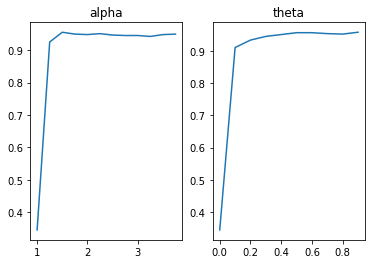

In [63]:
#testing on breast cancer
x = bc_OH
y = bc_y
alpha = np.arange(1, 4, 0.25)  # set of alpha to try
theta = np.arange(0,1, 0.1)    # set of thetas to try
k_fold = 5
res, best_alpha, best_theta = winnow_tuning_params(x, y, alpha, theta, k_fold)
print('5-fold average:', np.mean(res))

In [ ]:
# winnow_test on bc
x = bc_OH
y = bc_y
k_fold = 5
res = winnow_cv_test(x,y, k_fold,best_alpha, best_theta)
res

In [ ]:
#winnow_test on glass
x = glass_OH
y = glass_y_OH[2]
alpha = np.arange(1, 4, 0.25)
theta = np.arange(0,1, 0.1)
k_fold = 5
res, best_alpha, best_theta= winnow_tuning_params(x, y, alpha, theta, k_fold)
print('5-fold average:', np.mean(res))

In [ ]:
# winnow on glass
x = glass_OH
y = glass_y_OH
n = glass_y_OH.shape[1]
res = []
for i in range(n):
    res.append(winnow_cv_test(x,y[i],k_fold,best_alpha, best_theta))
np.mean(res,1)

In [ ]:
# winnow on iris
x = iris_OH
y = iris_y_OH[0]
alpha = np.arange(1, 4, 0.25)
theta = np.arange(0,1, 0.1)
k_fold = 5
res, best_alpha, best_theta = winnow_tuning_params(x, y, alpha, theta, k_fold)
print('5-fold average:', np.mean(res))

In [ ]:
# winnow on iris
x = iris_OH
y = iris_y_OH
n = iris_y_OH.shape[1]
res = []
for i in range(n):
    res.append(winnow_cv_test(x,y[i],k_fold,best_alpha, best_theta))
np.mean(res,1)

In [ ]:
# winnow param tuning on vote
x = vote_OH
y = vote_y
alpha = np.arange(1, 4, 0.25)
theta = np.arange(0,1, 0.1)
res, best_alpha, best_theta = winnow_tuning_params(x, y, alpha, theta, k_fold)
print('5 fold average', np.mean(res))

In [ ]:
# winnow on vote
x = vote_OH
y = vote_y
k_fold = 5
winnow_cv_test(x,y,k_fold, best_alpha, best_theta)

In [ ]:
# winnow_parameter tuning on soybean
x = soybean_OH
y = soybean_y_OH[1]
alpha = np.arange(1, 4, 0.25)
theta = np.arange(0,1, 0.1)
res, best_alpha, best_theta = winnow_tuning_params(x, y, alpha, theta, k_fold)
print('5 fold average', np.mean(res))

In [ ]:
# winnow on soybean
x = soybean_OH
y = soybean_y_OH
n = y.shape[1]
res = []
for i in range(n):
    res.append(winnow_cv_test(x, y[i]))
np.mean(res,1)

# [Naive_Bayes](#Index) *
Naive Bayes performs Bayesian Inference using the following probability principle:  
  
  $P(C_i|x) = \frac{P(x|C_i)P(C_i)}{P(x)} = \frac{P(x|C_i)P(C_i)}{\Sigma P(x|C_i)P(C_i)}$

We then need to compute priors and conditional probabilities for each combinations of classifications and attributes. 
For this project, in order to use the same dataset as for Winnow2, we use the one-hot encoded version of each dataset for NB as well. 

In [64]:
def NB_trainer(df_X, df_y, m =1, p = 0.001):
    res = []
    classes_y, y_count = np.unique(df_y, return_counts=True) # counting the priors
    if len(classes_y)<2:  # there has to be at least 2 classes
        classes_y = [0,1]
    X_counts = []
    N, M = df_X.shape # N: sample size, M: # of features
    likelihood = []
    for j in range(M): 
        arr_x = np.array(df_X)[:,j]
        classes_x, x_count = np.unique(arr_x, return_counts=True) 
        if len(classes_x<2):  # there has to be at least 2 classes
            classes_x = [0,1]
        n_y, n_x = len(classes_y), len(classes_x) # number of classes for target and features
        res_j = [[0 for _ in range(n_x)] for _ in range(n_y)]
        for i in range(len(arr_x)):  # for each sample, 
            x, y = arr_x[i], df_y[i]
            res_j[y][x]+=1  #count the constitution count for each class
        ## converting counts to probabilities using m-estimate ##
        for i in range(n_x):
            res_j[i] = np.divide(np.add(res_j[i], m*p),(sum(res_j[i])+m))
        likelihood.append(res_j)
        X_counts.append(x_count)
    
    ## converting y_count to priors
    priors = [(y_count[i]+m*p)/(sum(y_count)+m) for i in range(len(y_count))]
    ## converting x_counts to 
    evidence = [np.divide(X_counts[i], N) for i in range(len(X_counts))]
    
    return likelihood, priors, evidence

In [65]:
likelihood, priors, evidence = NB_trainer(train_X[0],train_y[0], m= 1, p=0.001)

In [66]:
pd.DataFrame(likelihood)

,0,1
0,"[0.6925235457063712, 0.3047119113573407]","[0.985005, 0.010005]"
1,"[0.8919695290858725, 0.10526592797783933]","[0.975005, 0.020005000000000002]"
2,"[0.7783961218836565, 0.2188393351800554]","[0.945005, 0.050004999999999994]"
3,"[0.8559584487534625, 0.1412770083102493]","[0.940005, 0.055005]"
4,"[0.8144072022160664, 0.18282825484764545]","[0.810005, 0.18500499999999998]"
...,...,...
85,"[0.9972326869806094, 2.7700831024930747e-06]","[0.985005, 0.010005]"
86,"[0.9944626038781162, 0.0027728531855955676]","[0.960005, 0.035005]"
87,"[0.9972326869806094, 2.7700831024930747e-06]","[0.960005, 0.035005]"
88,"[0.9972326869806094, 2.7700831024930747e-06]","[0.995005, 5e-06]"


In [67]:
pd.DataFrame(priors)

,0
0,0.642859
1,0.355359


In [68]:
def NB_classifier(sample_x, likelihood, priors, proba = False):
    """
    predict for a given sample vector, returns either proba or class
    """
    n_class = len(priors) #2 {0,1}
    n_attr = len(likelihood)
    y_hat = [1 for _ in range(n_class)]
    for i in range(n_class):
        for j in range(n_attr):
            y_hat[i]*=likelihood[j][i][sample_x[j]]
    if proba == True:
        return y_hat
    else:
        return np.argmax(y_hat) #same as max(enumerate(y_hat), key=lambda x:x[1])[0]

In [69]:
def NB_predict(test_x, likelihood, priors):
    """
    wrapper func to predict entire test dataset.
    """
    n_row, n_col = test_x.shape
    y_hat = []
    for i in range(n_row):
        y_hat.append(NB_classifier(np.array(test_x)[i], likelihood, priors))
    return y_hat

In [70]:
NB_predict(test_X[0], likelihood, priors)

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [71]:
def NB_cv_test(X, y, k_fold=5, m=1, p=0.001):
    train_X, train_y, test_X, test_y = cv_split(X,y, k_fold)
    res = []
    for i in range(k_fold):
        likelihood, priors, evidence = NB_trainer(train_X[i],train_y[i], m, p)
        likelihood = np.array(likelihood, dtype= object)
        y_hat = NB_predict(test_X[i], likelihood, priors)
        res.append(np.sum(y_hat==test_y[i])/len(test_y[i]))
    return res

In [72]:
# tuning params: first tuning m keeping p = 1e-3, then tune theta using the best alpha
def NB_tuning_params(X,y,m,p, k_fold=5):
    train_X, train_y, test_X, test_y = cv_split(X,y, k_fold)
    res_m = []
    for j in range(len(m)):
        m_j = m[j]
        res_i = []
        for i in range(k_fold):
            likelihood, priors, evidence = NB_trainer(train_X[i],train_y[i], m_j, p = 1e-3)
            y_hat = NB_predict(test_X[i], likelihood, priors)
            res_i.append(np.sum(y_hat==test_y[i])/len(test_y[i]))
        res_m.append(np.mean(res_i)) # taking the average of k_folding results
    # the m associated with the best result becomes the best_m
    best_m = m[np.argmax(res_m)]
    print('best_m: ', best_m)
    res_p = []
    for j in range(len(p)):
        p_j = p[j]
        res_i = []
        for i in range(k_fold):
            likelihood, priors, evidence = NB_trainer(train_X[i],train_y[i], best_m, p_j)
            y_hat = NB_predict(test_X[i], likelihood, priors)
            res_i.append(np.sum(y_hat==test_y[i])/len(test_y[i]))
        res_p.append(np.mean(res_i)) # taking the average of k_folding results
    best_p = theta[np.argmax(res_p)]
    print('best_p:', best_p)
    ###ploting the progress###
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(m, res_m)
    ax1.set_title('m')
    ax2.plot(p, res_p)
    ax2.set_title('p')
    ###########################
    # Testing with the best alpha and theta
    res = NB_cv_test(X, y, k_fold, best_m, best_p)
    return res, np.round(best_m,3), np.round(best_p,3)

best_m:  19
best_p: 0.1
0.9727536231884057


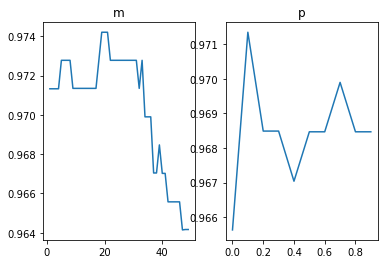

In [73]:
# NB tuning on bc
X = bc_OH
y = bc_y
m = [i for i in range(1,50)]
p = np.arange(0,1, 0.1)
res, best_m, best_p = NB_tuning_params(X,y,m,p, k_fold=5)
print(np.mean(res))

In [ ]:
# NB testing on bc
X = bc_OH
y = bc_y
res = NB_cv_test(X, y, k_fold=5, m=best_m, p=best_p)
# 5 fold cv test
res

In [ ]:
# NB tuning on vote
X = vote_OH
y = vote_y
m = [i for i in range(1,100)]
p = np.arange(0,1, 0.1)
res, best_m, best_p = NB_tuning_params(X,y, m, p)
print('5 fold average:', np.mean(res))

In [ ]:
#testing on vote
res = NB_cv_test(X, y, k_fold=5, m=best_m, p=best_p)
np.mean(res)

In [ ]:
# NB tuning on iris
X = iris_OH
y = iris_y_OH[2]
m = [i for i in range(1,50)]
p = np.arange(0,1, 0.1)
res, best_m, best_p = NB_tuning_params(X,y,m,p, k_fold=5)
print('5 fold average:', np.mean(res))

In [ ]:
# NB test on iris
x = iris_OH
y = iris_y_OH
n = iris_y_OH.shape[1]
res = []
for i in range(n):
    res.append(NB_cv_test(x,y[i],k_fold=5, m=best_m, p=best_p))
np.mean(res)

In [ ]:
# NB tuning on glass
X = glass_OH
y = glass_y_OH[6]
m = [i for i in range(1,10)]
p = np.arange(0,1, 0.1)
res, best_m, best_p= NB_tuning_params(X,y,m,p, k_fold=5)
print('5 fold average:', np.mean(res))

In [ ]:
# NB testing on glass
X = glass_OH
y = glass_y_OH
n = y.shape[1]
for i in range(n):
    res.append(NB_cv_test(X,y[i],k_fold=5, m=best_m, p=best_p))
np.mean(res,dtype=object)

In [ ]:
# NB tuning on soybean
X = soybean_OH
y = soybean_y_OH[2]
m = [i for i in range(1,10)]
p = np.arange(0,1, 0.1)
res, best_m, best_p= NB_tuning_params(X,y,m,p, k_fold=5)
print('5 fold average:', np.mean(res))

In [ ]:
# NB test on soybean
X = soybean_OH
y = soybean_y_OH
n = y.shape[1]
for i in range(n):
    res.append(NB_cv_test(X,y[i],k_fold=5, m=best_m, p=best_p))
np.mean(res, dtype=object)